In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r".\DATA\tmp_prepare.csv")

In [3]:
data.head(3)

,SWE Store Key,Region,Distrib,Office,FFDSL,TSE/MTDE,Уровень Торг Региона 1,Уровень Торг Региона 2,Filial Name,Filial Ship To,...,Chain. Chain Sub Tier MWC,Channel Name 2018,Outlet Type 2018,Trade Structure,From Dc,Segment MWC. Segment Name,Cluster MWC,Ship-to TO BE (загружено RSS),Latitude,Longitude
0,1000201031,Siberia,ООО Гермес,MWC ООО Гермес (Новокузнецк),MWC FFDL Kuzbass (Vetrova Marina),MWC TSE Novokuznetsk (Sandler Kseniya),TL MWC: Север Кузбасса (Мокроусов Илья),Агент МарсРигли-08 (Киселевск-2)(Погребных А.)...,MWC ООО Гермес (Новокузнецк),10340352,...,Other,Traditional Independent Trade,BTC,TT,False,C1,Cluster 2,10340352,54.002310,86.543748
1,100050000000002,North-West,ЗАО Денди,MWC Денди ЗАО,MWC FFDL SPb (Brus Roman),MWC TSE St.Petersburg 1 (Baranov Igor),TL: 4323 - Svetlichniys (DISTR: Денди) (Svetli...,SR: 98069 - Кукко_d (Кукко Наталья_d),MWC Денди ЗАО,10407751,...,Other,Traditional Independent Trade,BTC,TT,True,C0,Cluster 3,10407751,59.838353,30.387724
2,100050000000031,North-West,ЗАО Денди,MWC Денди ЗАО,MWC FFDL SPb (Brus Roman),MWC TSE St.Petersburg 1 (Baranov Igor),TL: 4322 - Виртуальная территория_d (Vacant),Виртуальная территория_d (Vacant),MWC Денди ЗАО,10407751,...,Other,Traditional Independent Trade,BTC,TT,False,C0,Cluster 3,10407751,59.904175,30.420953


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217320 entries, 0 to 217319
Data columns (total 24 columns):
SWE Store Key                    217320 non-null int64
Region                           217320 non-null object
Distrib                          217320 non-null object
Office                           217320 non-null object
FFDSL                            217320 non-null object
TSE/MTDE                         217320 non-null object
Уровень Торг Региона 1           217320 non-null object
Уровень Торг Региона 2           217320 non-null object
Filial Name                      217320 non-null object
Filial Ship To                   217320 non-null object
Chain Type                       217320 non-null object
Chain Name                       217320 non-null object
Chain Id                         217320 non-null int64
Chain. Chain Tier MWC            217320 non-null object
Chain. Chain Sub Tier MWC        217320 non-null object
Channel Name 2018                217320 non-null ob

In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SWE Store Key,217320,NaN,NaN,NaN,1.01312e+14,1.22823e+12,1.0002e+09,1.0005e+14,1.0099e+14,1.0235e+14,1.0445e+14
Region,217320,8,South,44338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distrib,217320,62,!ERR,18700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Office,217320,168,!ERR,18700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFDSL,217320,39,MWC FFDL Irkutsk (Nebolsin Andrei),9097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TSE/MTDE,217320,350,!ERR,4176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Уровень Торг Региона 1,217320,518,!ERR,18700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Уровень Торг Региона 2,217320,2521,!ERR,18700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Filial Name,217320,106,!ERR,18701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Filial Ship To,217320,97,!ERR,19793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.shape

(217320, 24)

----------------------------------------
# Clear data and types

In [9]:
# index
data.set_index("SWE Store Key", inplace=True)  # Не нужен - в индекс его.

In [10]:

# Очистим итоговые данные, есть в "Ship-to TO BE (загружено RSS)" - записи через зяпятую... что это х.з., пока уберем совсем
condition = data["Ship-to TO BE (загружено RSS)"].astype(str).apply(lambda x: len(x))!=9
data[condition].head(3)

,Region,Distrib,Office,FFDSL,TSE/MTDE,Уровень Торг Региона 1,Уровень Торг Региона 2,Filial Name,Filial Ship To,Chain Type,...,Chain. Chain Sub Tier MWC,Channel Name 2018,Outlet Type 2018,Trade Structure,From Dc,Segment MWC. Segment Name,Cluster MWC,Ship-to TO BE (загружено RSS),Latitude,Longitude
SWE Store Key,,,,,,,,,,,,,,,,,,,,,
100050000000109,North-West,SF Мегаполис,MWC Мегаполис (Санкт-Петербург),MWC FFDL SPb (Brus Roman),MWC TSE SPb (Scheglov Andrey),TL 3 MWC (Ткаченко Дмитрий),SR: 98036 - Дзеранов (Дзеранов Алан),MWC Мегаполис (Санкт-Петербург),10407053,Без сетей,...,Other,Traditional Independent Trade,BTC,TT,False,C1,Cluster 3,NaN,59.808855,30.075201
100050000000112,North-West,SF Мегаполис,MWC Мегаполис (Санкт-Петербург),MWC FFDL SPb (Brus Roman),MWC TSE SPb (Tkachev Timur),TL 5 MWC (Фалева Наталья),Всеволожский р-н (Дмитриев Михаил),MWC Мегаполис (Санкт-Петербург),10407053,Без сетей,...,Other,Traditional Independent Trade,BTC,TT,False,C1,Cluster 3,NaN,59.960498,31.030065
100050000000118,North-West,SF Мегаполис,MWC Мегаполис (Санкт-Петербург),MWC FFDL SPb (Brus Roman),MWC TSE SPb (Scheglov Andrey),TL 1 MWC (Симанкович Алексей),SR: 98016 - Ященко (Ященко),MWC Мегаполис (Санкт-Петербург),10407053,Без сетей,...,Other,Modern Grocery,Small minimarket 0-100m,Other MT,False,B2,Cluster 3,NaN,59.954854,30.305115


In [11]:
data.drop(data[condition].index, inplace=True)
data.shape

(203859, 23)

In [12]:
# X cols & Y cols

Y_COLS = ["Ship-to TO BE (загружено RSS)"]
X_COLS = [col for col in data.columns if col not in Y_COLS]

In [13]:
# data change types if needed

data["Chain Id"] = data["Chain Id"].astype(str)

In [14]:
### !ERR - это заменяем null  None  - str / pd.NaT - Datetime / pd.np.NaN - float
data.replace({"!ERR":None}, inplace=True)

In [15]:
# Drop null for Y_COLS
data.dropna(subset=Y_COLS, inplace=True)
data.shape

(203859, 23)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203859 entries, 1000201031 to 104450000000101
Data columns (total 23 columns):
Region                           185481 non-null object
Distrib                          185531 non-null object
Office                           185531 non-null object
FFDSL                            199854 non-null object
TSE/MTDE                         199854 non-null object
Уровень Торг Региона 1           185531 non-null object
Уровень Торг Региона 2           185531 non-null object
Filial Name                      185530 non-null object
Filial Ship To                   184442 non-null object
Chain Type                       203859 non-null object
Chain Name                       203859 non-null object
Chain Id                         203859 non-null object
Chain. Chain Tier MWC            203859 non-null object
Chain. Chain Sub Tier MWC        203859 non-null object
Channel Name 2018                203846 non-null object
Outlet Type 2018               

In [18]:
descr = data.describe(include='all').T
descr

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Region,185481,7,South,44104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distrib,185531,60,ООО Предприятие АЛИДИ,14804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Office,185531,163,MWC ООО Сладкая жизнь Плюс,8346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFDSL,199854,38,MWC FFDL Irkutsk (Nebolsin Andrei),8942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TSE/MTDE,199854,348,MWC TSE Novosibirsk (Rehtin Igor),4034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Уровень Торг Региона 1,185531,498,РМ Рожков Дмитрий Вирт.Тер. МСК (Рожков Дмитрий),1814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Уровень Торг Региона 2,185531,2369,Агент Wrigley Денди (Агент Ригли Агент Ригли),1551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Filial Name,185530,102,MWC ООО Сладкая жизнь Плюс,8346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Filial Ship To,184442,95,10335966,8346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chain Type,203859,5,Без сетей,150037,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Посмотрим что получилось по значениям Y, там должно быть минимум 2 варианта, чтобы корректно разложить на трейн и тест
# Очевидно, что где есть только 1 пример ShipTo - то мы его не обучим

In [19]:
# Какая колонка самая репрезентативная (совсем нет пустых строк)
descr.sort_values(by=["count"],ascending=False).head(1)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Chain Id,203859,3597,-2,150037,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data.groupby(Y_COLS)["Chain Id"].count().sort_values(ascending=False).tail(10)
# есть только 1 пример ShipTo  - внизу списка, киляем их

Ship-to TO BE (загружено RSS)
 10443104    13
 10441510     9
 10443103     7
 10441560     7
 10445233     5
 10441605     3
 10443031     2
 10442916     2
 10443010     1
 10442164     1
Name: Chain Id, dtype: int64

In [21]:
condition_y_cnt = data.groupby(Y_COLS)["Chain Id"].count()<2
# condition_y_cnt[condition_y_cnt==True].index
data[data["Ship-to TO BE (загружено RSS)"].isin(condition_y_cnt[condition_y_cnt==True].index)]

,Region,Distrib,Office,FFDSL,TSE/MTDE,Уровень Торг Региона 1,Уровень Торг Региона 2,Filial Name,Filial Ship To,Chain Type,...,Chain. Chain Sub Tier MWC,Channel Name 2018,Outlet Type 2018,Trade Structure,From Dc,Segment MWC. Segment Name,Cluster MWC,Ship-to TO BE (загружено RSS),Latitude,Longitude
SWE Store Key,,,,,,,,,,,,,,,,,,,,,
100690000011654,North-West,ООО Алиди-Норд,MWC Алиди-Норд (Санкт-Петербург) ОРТ,"MWC FFDL SPB, Murmansk, Pskov, Novgorod (Rozhd...","MWC TSE SPB, Len Obl 1 (Kozlov Aleksander)",TL MWC Вирт. территория ОПТ Алиди Норд (Ваканс...,Агент MWC Вирт. территория ОПТ Алиди Норд (Вак...,MWC Алиди-Норд (Санкт-Петербург) ОРТ,10443010,Без сетей,...,Other,Wholesale,Wholesale,WHS,False,WHS,Cluster 3,10443010,0.000000,0.000000
100830000004565,Ural,ООО Эвенкс,MWC ООО Эвенкс,MWC FFDL Ekaterinburg (Lebedev Sergey),MWC TSE Ekaterinburg 2 (Shigaev Ruslan),TL MWC 2 Карпенко К. (КАРПЕНКО КИРИЛЛ),МАТЮШКИН А. (МАТЮШКИН АНДРЕЙ),MWC ООО Эвенкс,10342443,Без сетей,...,Other,Wholesale,Wholesale,WHS,False,WHS,Cluster 2,10442164,56.976211,60.564964


In [22]:
data.drop(
    data[data["Ship-to TO BE (загружено RSS)"].isin(condition_y_cnt[condition_y_cnt==True].index)].index,
    inplace=True)
data.shape

(203857, 23)

# X and y  / Train test split

In [23]:
X = data[X_COLS]
y = data[Y_COLS]

In [24]:
cat_features = X.select_dtypes(include=['object']).columns  # Categorical
num_features = X.select_dtypes(exclude=['object']).columns  # Numeric

cat_features, num_features

(Index(['Region', 'Distrib', 'Office', 'FFDSL', 'TSE/MTDE',
        'Уровень Торг Региона 1', 'Уровень Торг Региона 2', 'Filial Name',
        'Filial Ship To', 'Chain Type', 'Chain Name', 'Chain Id',
        'Chain. Chain Tier MWC', 'Chain. Chain Sub Tier MWC',
        'Channel Name 2018', 'Outlet Type 2018', 'Trade Structure',
        'Segment MWC. Segment Name', 'Cluster MWC'],
       dtype='object'),
 Index(['From Dc', 'Latitude', 'Longitude'], dtype='object'))

In [25]:
for col in cat_features:
    X[col]=X[col].astype(str)

c:\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [27]:
[i.shape for i in [X_train, X_test, y_train, y_test]]

[(142699, 22), (61158, 22), (142699, 1), (61158, 1)]

# Pipeline for train

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
%%time

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessing = ColumnTransformer(
    [('cat', cat_pipe, cat_features),
     ('num', num_pipe, num_features)
    ])

rf = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

rf.fit(X_train, y_train)

# Wall time: 1min 21s - n_estimators=100

c:\python36\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Wall time: 1min 21s


In [30]:
print("RF train accuracy: {0:.4f}".format(rf.score(X_train, y_train)))
print("RF test accuracy: {0:.4f}".format(rf.score(X_test, y_test)))

RF train accuracy: 0.9994
RF test accuracy: 0.9936


In [ ]:
# Only NUM Features -----------------------
# RF train accuracy: 0.911
# RF test accuracy: 0.861

# All Features n-estim =10 ----------------
# RF train accuracy: 0.999
# RF test accuracy: 0.993

# All Features n-estim = 100 --------------
# RF train accuracy: 0.9994
# RF test accuracy: 0.9936

In [167]:
# One hot Encoder object for features names
ohe = (rf.named_steps['preprocess']
         .named_transformers_['cat']
         .named_steps['onehot'])
cat_ohe_feature_names = ohe.get_feature_names(input_features=cat_features)

feature_names = np.append(cat_ohe_feature_names, num_features)

features_raw = []
for fname, fval  in zip(cat_features,cat):
    features_raw = np.append(features_raw, [fname] * len(fval))
features_raw = np.append(features_raw, num_features)    
    
# Random forest classifier object for importances
rfc = rf.named_steps['classifier']

fimp_pd = pd.DataFrame(
    {"Feature":features_raw,
     "FeatureName":feature_names,
     "Importance":rfc.feature_importances_
    }
).sort_values(["Importance"], ascending=False)

fimp_pd.head(5)

,Feature,FeatureName,Importance
10163,Longitude,Longitude,0.022225
10162,Latitude,Latitude,0.020078
10158,Cluster MWC,Cluster MWC_Cluster 2,0.009781
7,Region,Region_Volga,0.008329
236,FFDSL,FFDSL_MWC FFDL Crimea (Dzyuba Pavel),0.007971


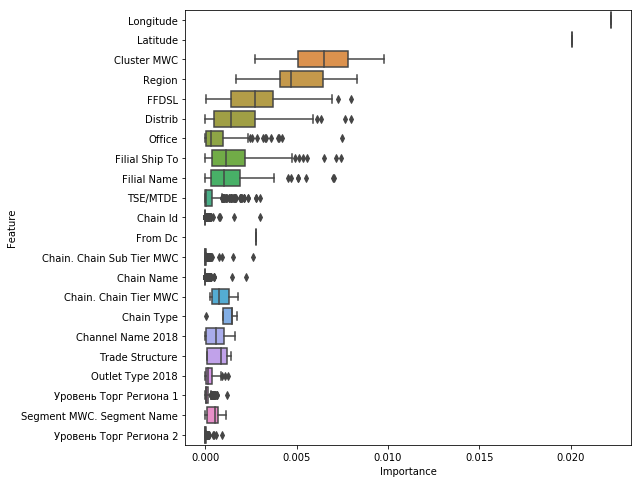

In [168]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.boxplot(data=fimp_pd, 
            y="Feature", 
            x="Importance", 
           )

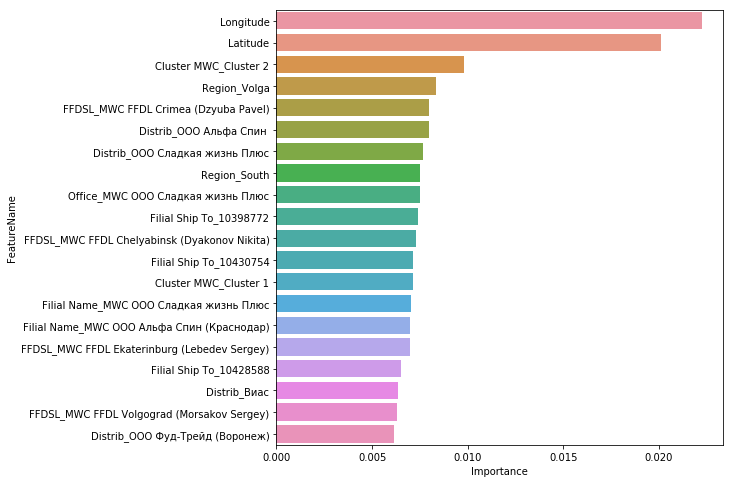

In [170]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.barplot(data = fimp_pd.head(20),
            x="Importance", y = "FeatureName")